In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load processed data 
base_path = '../source/'
exhibitors_final_df = pd.read_csv(os.path.join(base_path, 'processed_exhibitors_categories.csv'))
exhibitors_final_df

,exhibitorid,exhibitorName,categoryId,categoryName,parentCategory
0,90556,Turkey Travels,52276,1.5 Resort hotel,1. Accomodation providers
1,90556,Turkey Travels,52280,2.1 Inbound tour operator,2. Tour operators
2,90556,Turkey Travels,52281,2.2 Outbound tour operator,2. Tour operators
3,92462,Russian Travel Company,52273,1.2 Apartments / Residential hotel,1. Accomodation providers
4,92462,Russian Travel Company,52283,2.4 Mass market tour operators,2. Tour operators
...,...,...,...,...,...
178,17729,Sunny Travel Journeys,52282,2.3 Receptive / ground operator,2. Tour operators
179,17729,Sunny Travel Journeys,52272,1.1 Hotel / Hotel chain / Inn,1. Accomodation providers
180,17729,Sunny Travel Journeys,52329,10.5 Zoo,10. Museums & parks
181,17729,Sunny Travel Journeys,52366,"17.3 Banking, investments",17. Insurance companies & banking


In [3]:
categories = exhibitors_final_df['parentCategory'].unique()
# Sorting based on numerical prefix
sorted_categories = sorted(categories, key=lambda x: int(x.split('.')[0]))
sorted_categories

['1. Accomodation providers',
 '2. Tour operators',
 '3. Travel  agencies',
 '4. Online travel agency',
 '5. Transport services / air carriage',
 '6. Motorhomes & caravans',
 '7. Mobile homes & glampings',
 '8. Health & medical tourism',
 '9. Hotel equipment & service suppliers',
 '10. Museums & parks',
 '11. MICE and event management',
 '12. Tourist board / Government / NTO',
 '13. IT solutions for travel industry',
 '14. Niche tourism',
 '15. Media',
 '16. Real estate agencies',
 '17. Insurance companies & banking']

## Top 20 Most Popular Exhibitor Categories
parentCategory
1. Accomodation providers                 15
10. Museums & parks                       13
14. Niche tourism                         13
2. Tour operators                         12
12. Tourist board / Government / NTO      12
17. Insurance companies & banking         11
13. IT solutions for travel industry      10
5. Transport services / air carriage      10
6. Motorhomes & caravans                   9
3. Travel  agencies                        9
8. Health & medical tourism                9
15. Media                                  8
4. Online travel agency                    6
9. Hotel equipment & service suppliers     6
11. MICE and event management              5
7. Mobile homes & glampings                4
16. Real estate agencies                   4
Name: count, dtype: int64


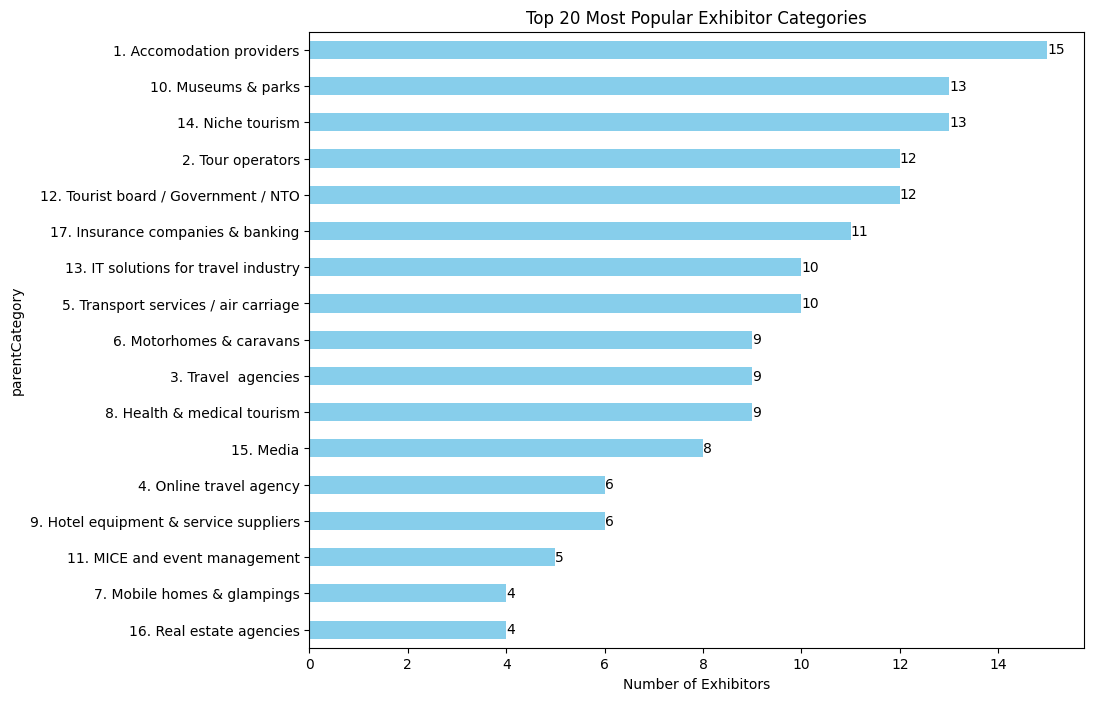

In [4]:
# Top 20 Most Popular Exhibitor Categories
print("## Top 20 Most Popular Exhibitor Categories")
category_counts = exhibitors_final_df[['exhibitorid', 'parentCategory']].drop_duplicates()['parentCategory'].value_counts().nlargest(20)

print(category_counts)

plt.figure(figsize=(10, 8))
ax = category_counts.plot(kind='barh', color='skyblue')

plt.title('Top 20 Most Popular Exhibitor Categories')
plt.xlabel('Number of Exhibitors')
plt.gca().invert_yaxis()

# Add numbers on bars
for index, value in enumerate(category_counts):
    plt.text(value, index, str(value), va='center')

plt.show()

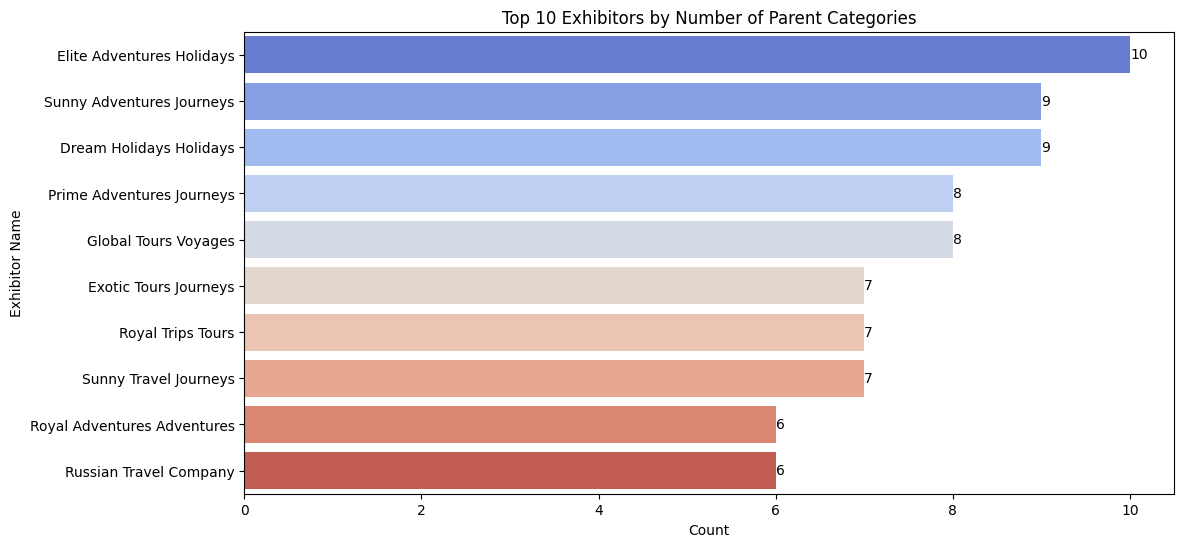

In [5]:
# Count categories per exhibitor
exhibitor_counts = exhibitors_final_df[['exhibitorName', 'parentCategory']].drop_duplicates()["exhibitorName"].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=exhibitor_counts.index[:10], x=exhibitor_counts.values[:10], palette="coolwarm", hue = exhibitor_counts.index[:10])

plt.xlabel("Count")
plt.ylabel("Exhibitor Name")
plt.title("Top 10 Exhibitors by Number of Parent Categories")

# Add count labels on bars
for index, value in enumerate(exhibitor_counts.values[:10]):
    ax.text(value, index, str(value), va='center')

plt.show()

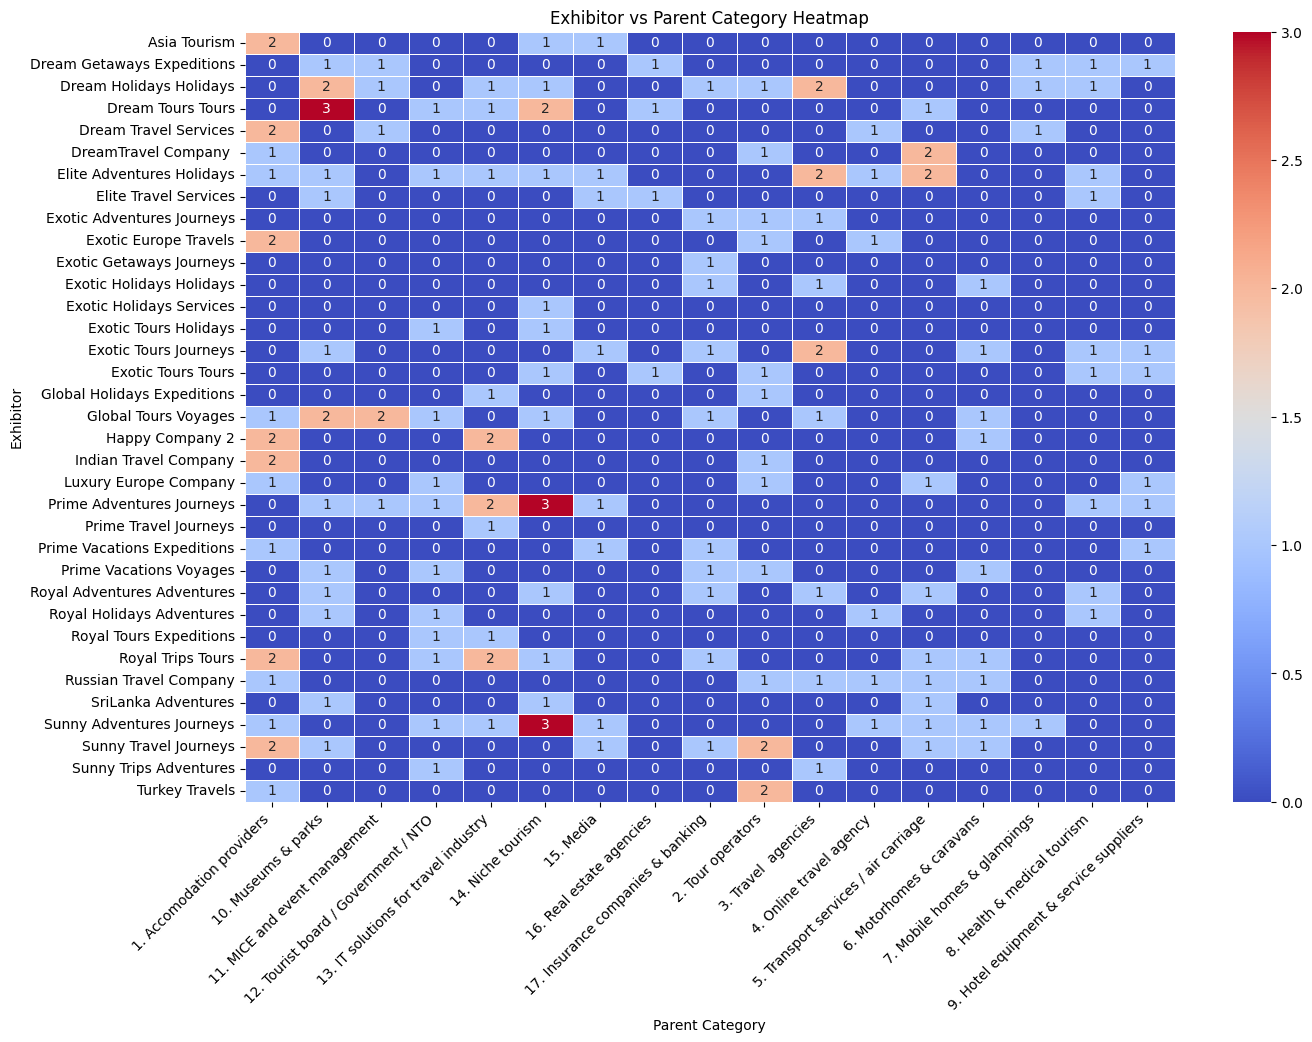

In [6]:
# Heatmap of exhibitor vs category relationships
pivot_table = exhibitors_final_df.pivot_table(index="exhibitorName", columns="parentCategory", aggfunc="size", fill_value=0)

plt.figure(figsize=(15, 10))
ax = sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, annot=True, fmt="d")
plt.title("Exhibitor vs Parent Category Heatmap")
plt.ylabel("Exhibitor")
plt.xlabel("Parent Category")
plt.xticks(rotation=45, ha="right")

plt.show()


## Distribution of Number of Categories per Exhibitor
count    35.000000
mean      4.457143
std       2.512824
min       1.000000
25%       2.500000
50%       4.000000
75%       6.000000
max      10.000000
Name: parentCategory, dtype: float64


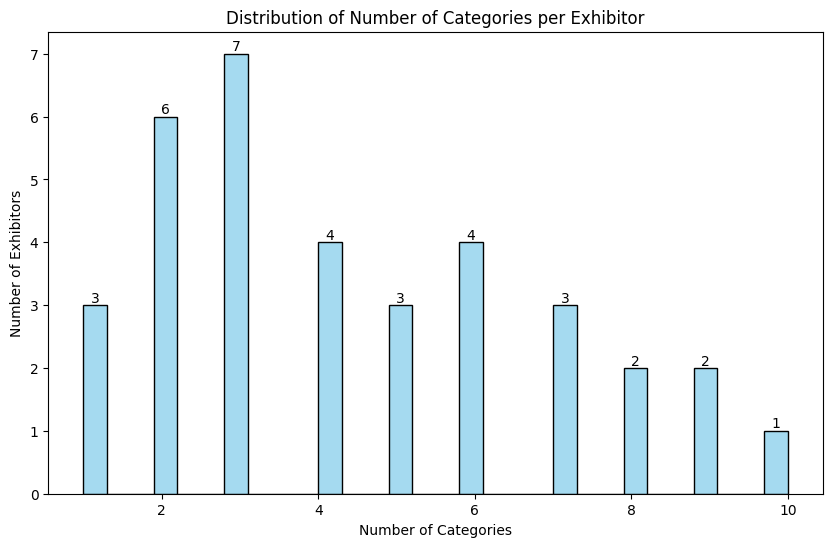

In [7]:
# ## Analysis of Categories per Exhibitor
print("\n## Distribution of Number of Categories per Exhibitor")
categories_per_exhibitor = exhibitors_final_df.groupby('exhibitorName')['parentCategory'].nunique().sort_values(ascending=False)
print(categories_per_exhibitor.describe())

plt.figure(figsize=(10, 6))
ax = sns.histplot(categories_per_exhibitor, bins=30, kde=False, color="skyblue")

plt.title('Distribution of Number of Categories per Exhibitor')
plt.xlabel('Number of Categories')
plt.ylabel('Number of Exhibitors')

# Add count labels on top of bars
for p in ax.patches:
    if p.get_height() > 0:  # Avoid labeling bars with height 0
        ax.annotate(int(p.get_height()), 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [9]:
# Identify exhibitors selecting a large number of categories (potential issue for recommendations)
print(f"\nExhibitors with >= 6 categories: {len(categories_per_exhibitor[categories_per_exhibitor >= 6])}")
print(categories_per_exhibitor.head(20)) # Show exhibitors with the most categories


Exhibitors with >= 6 categories: 12
exhibitorName
Elite Adventures Holidays      10
Sunny Adventures Journeys       9
Dream Holidays Holidays         9
Prime Adventures Journeys       8
Global Tours Voyages            8
Sunny Travel Journeys           7
Royal Trips Tours               7
Exotic Tours Journeys           7
Dream Getaways Expeditions      6
Royal Adventures Adventures     6
Dream Tours Tours               6
Russian Travel Company          6
Exotic Tours Tours              5
Luxury Europe Company           5
Prime Vacations Voyages         5
Prime Vacations Expeditions     4
Dream Travel Services           4
Elite Travel Services           4
Royal Holidays Adventures       4
Asia Tourism                    3
Name: parentCategory, dtype: int64
